In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


# Load prepared data

In [4]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/"

## fmap mean all experiments

In [5]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [6]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


## 55 fmap means

In [14]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        name = str(arr[i])+'_'+str(j+1)+'m'+str(j)
        col.append(name)

In [15]:
file_name = save_path+"fmap_mean_55.txt"
columns = ['exp', 'mini_exp', 'i', 'j', 'k']
for i in range(len(col)): 
    columns.append(col[i])
columns.append('theory')
data = np.loadtxt(file_name);

In [16]:
df_55 = pd.DataFrame(data, columns=columns)
df_55 = df_55.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df_55

,exp,mini_exp,i,j,k,4_2m1,4_3m2,4_4m3,4_5m4,4_6m5,...,12_4m3,12_5m4,12_6m5,12_7m6,12_8m7,12_9m8,12_10m9,12_11m10,12_12m11,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_55.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 61 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   4_2m1     float64
 6   4_3m2     float64
 7   4_4m3     float64
 8   4_5m4     float64
 9   4_6m5     float64
 10  4_7m6     float64
 11  4_8m7     float64
 12  4_9m8     float64
 13  4_10m9    float64
 14  4_11m10   float64
 15  4_12m11   float64
 16  6_2m1     float64
 17  6_3m2     float64
 18  6_4m3     float64
 19  6_5m4     float64
 20  6_6m5     float64
 21  6_7m6     float64
 22  6_8m7     float64
 23  6_9m8     float64
 24  6_10m9    float64
 25  6_11m10   float64
 26  6_12m11   float64
 27  8_2m1     float64
 28  8_3m2     float64
 29  8_4m3     float64
 30  8_5m4     float64
 31  8_6m5     float64
 32  8_7m6     float64
 33  8_8m7     float64
 34  8_9m8     float64
 35  8_10m9    float64
 36  8_11m10 

## Only +ON and -ON

In [18]:
file_name = save_path+"fmap_on.txt"
columns =['exp', 'mini_exp', 'run', 'i', 'j', 'k', 'off', 'on', 'theory']
data = np.loadtxt(file_name);

In [19]:
df_on = pd.DataFrame(data, columns=columns)
df_on = df_on.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, "run":int})
df_on

,exp,mini_exp,run,i,j,k,off,on,theory
0,36,1,1,0,0,0,0.0,0.0,0.0
1,36,1,1,0,0,1,0.0,0.0,0.0
2,36,1,1,0,0,2,0.0,0.0,0.0
3,36,1,1,0,0,3,0.0,0.0,0.0
4,36,1,1,0,0,4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6488059,38,6,-1,43,63,59,0.0,0.0,0.0
6488060,38,6,-1,43,63,60,0.0,0.0,0.0
6488061,38,6,-1,43,63,61,0.0,0.0,0.0
6488062,38,6,-1,43,63,62,0.0,0.0,0.0


In [20]:
df_on.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6488064 entries, 0 to 6488063
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   run       int64  
 3   i         int64  
 4   j         int64  
 5   k         int64  
 6   off       float64
 7   on        float64
 8   theory    float64
dtypes: float64(3), int64(6)
memory usage: 445.5 MB


# Split data

## Data 1. fmap mean all experiments

In [10]:
X = df.iloc[:, 2:-1].values  # include i,j,k
y = df['theory'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [12]:
print(X.shape)
print(y.shape)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(3244032, 8)
(3244032,)
(2270822, 8)
(2270822,)
(973210, 8)
(973210,)


## Data3: One experiment

In [9]:
df_train = df[(df['exp']==38) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==38) & (df['mini_exp']==6)]

In [21]:
df_train = df[(df['exp']==38) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==38) & (df['mini_exp']==6)]

In [22]:
X3_train = df_train.iloc[:, 2:-1].values
y3_train = df_train['theory'].values

X3_test = df_test.iloc[:, 2:-1].values
y3_test = df_test['theory'].values

In [23]:
print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)

(901120, 8)
(901120,)
(180224, 8)
(180224,)


## Data5: 55 fmap means

In [25]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        name = str(arr[i])+'_'+str(j+1)+'m'+str(j)
        col.append(name)

In [27]:
X = df_55.iloc[:, 2:-1].values  # include i,j,k
y = df_55['theory'].values

X5_train, X5_test, y5_train, y5_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [28]:
print(X.shape)
print(y.shape)
print(X5_train.shape)
print(y5_train.shape)
print(X5_test.shape)
print(y5_test.shape)

(3244032, 58)
(3244032,)
(2270822, 58)
(2270822,)
(973210, 58)
(973210,)


## Data6: Only +ON and -ON

In [29]:
X = df_on.iloc[:, 2:-1].values  # include i,j,k
y = df_on['theory'].values

X6_train, X6_test, y6_train, y6_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [30]:
print(X.shape)
print(y.shape)
print(X6_train.shape)
print(y6_train.shape)
print(X6_test.shape)
print(y6_test.shape)

(6488064, 6)
(6488064,)
(4541644, 6)
(4541644,)
(1946420, 6)
(1946420,)


# Convolutional Neural Network

## Data2: One experiments

In [148]:
# 1D Conv
input_shape = [len(X_train2[0]), 1]
 
model3 = keras.Sequential()
model3.add(layers.Conv1D(32, 3, activation ="relu", input_shape=input_shape))
model3.add(layers.MaxPooling1D(2))
model3.add(layers.Conv1D(64, 3, activation ="relu"))
model3.add(layers.MaxPooling1D(1))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation ="relu"))
model3.add(layers.Dense(1, activation ="softmax"))
#
model3.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history3 = model3.fit(X_train2, y_train2, epochs=20, verbose=0, validation_data=[X_test2, y_test2], callbacks =[myCallbacks])


In [149]:
train_pred3 = model3.predict(X_train2)
print(mse(train_pred3, y_train2))
test_pred3 = model3.predict(X_test2)
print(mse(test_pred3, y_test2))

28160/28160 [==============================] - 23s 821us/step
101.07454554252826
5632/5632 [==============================] - 4s 750us/step
101.32703448493652


In [150]:
model3.evaluate(X_test2, y_test2)

5632/5632 [==============================] - 5s 892us/step - loss: 101.3271 - accuracy: 5.5487e-06


[101.3271484375, 5.548650733544491e-06]

In [151]:
model3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 6, 32)             128       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 3, 32)            0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 1, 64)             6208      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 64)              

In [152]:
history3.history

{'loss': [101.0746078491211,
  101.07494354248047,
  101.07463836669922,
  101.07423400878906,
  101.0742416381836,
  101.0743408203125],
 'accuracy': [5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06],
 'val_loss': [101.3271484375,
  101.3271484375,
  101.3271484375,
  101.3271484375,
  101.3271484375,
  101.3271484375],
 'val_accuracy': [5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06]}

## Plot

### Loss function (MSE)

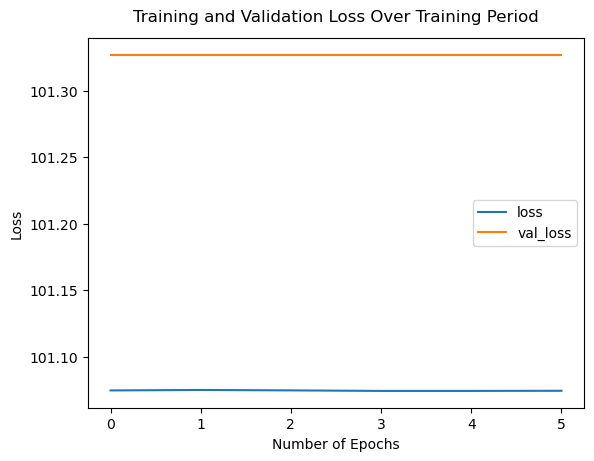

In [153]:
model_df = pd.DataFrame(history3.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

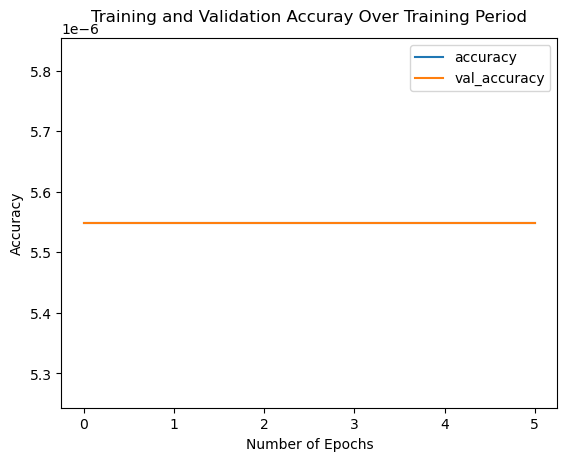

In [154]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

In [118]:
test_pred3

array([[ 0.6982533 ],
       [ 0.6657635 ],
       [ 0.6234076 ],
       ...,
       [-0.80281734],
       [-0.81414175],
       [-0.82546663]], dtype=float32)

# Output image data

In [115]:
df_test['predict'] = test_pred
df_test['predict2'] = test_pred2
df_test['predict3'] = test_pred3

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict2'] = test_pred2


In [116]:
np.savetxt(save_path+"nn.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [117]:
np.savetxt(save_path+"nn2.txt", df_test[['i', 'j', 'k', 'predict2']], fmt="%i %i %i %s")

In [ ]:
np.savetxt(save_path+"nn3.txt", df_test[['i', 'j', 'k', 'predict3']], fmt="%i %i %i %s")